# Implementasi VSM TF-IDF menggunakan Klasifikasi Logistic Regression


## Logistic Regression


Rumus Logistic Regression


!['formula.png'](https://d1.awsstatic.com/sigmoid.bfc853980146c5868a496eafea4fb79907675f44.png)


!['grafik.png'](https://d1.awsstatic.com/S-curve.36de3c694cafe97ef4e391ed26a5cb0b357f6316.png)


Fungsi logistic yang hanya mengembalikan nilai antara 0 dan 1 uuntuk variabel dependen.

<hr>


Regresi logistik adalah teknik analisis data yang berguna untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.


## Proses Implementasi Logistic Regression


### Import library/tools yang dibutuhkan


In [1]:
# Library untuk data manipulation & visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing data
from sklearn import preprocessing

# Library untuk model & evaluasi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Library untuk save model
import pickle

- **pandas** digunakan untuk membuat dataframe agar mudah dibaca.
- **matplotlib** & **seaborn** digunakan untuk visualisasi grafik.
- **preprocessing** untuk melakukan proses label encoding.
- **LogisticRegression** digunakan untuk proses modelling logistic regression.
- **classification_report** & **confusion_matrix** digunakan untuk melihat hasil evaluasi atau laporan setelah proses modelling.
- **pickle** unutk menyimpan model.


### Load dataset VSM TF-IDF


In [31]:
data_train = pd.read_csv('../tugas2/data_train_vsm.csv')
data_test = pd.read_csv('../tugas2/data_test_vsm.csv')

### Encoding label dataset


In [32]:
label_encoder = preprocessing.LabelEncoder()

# Encode Train Kategori Berita
data_train['Kategori Berita'] = label_encoder.fit_transform(data_train['Kategori Berita'])
data_test['Kategori Berita'] = label_encoder.fit_transform(data_test['Kategori Berita'])


Melakukan proses encoding pada dataset, yaitu pada kolom **Kategori Berita**. Pada kolom tersebut merupakan data target yang nantinya akan diproses, data tersebut merupkan data kategorikal kemudian dirubah menjadi numerik agar bisa diproses dalam model logistic Regression.

Hasil Encoding:

- Nasional = 1
- Internasional = 0


In [21]:
data_train

,Kategori Berita,abad,abah,abai,abat,abdi,abdul,abdulla,abdullah,abdulloh,...,zaki,zaman,zambia,zayed,zelenskiy,zelensky,zikir,zionis,zulhas,zulkifli
0,1,0.000000,0.0,0.026348,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.046459,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.046459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split dataset (train & target)


In [35]:
X_train = data_train.drop(['Kategori Berita'], axis=1)
y_train = data_train['Kategori Berita']

X_test = data_test.drop(['Kategori Berita'], axis=1)
y_test = data_test['Kategori Berita']

Memisahkan antara data train dan target.


In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1799)
x_transform = svd.fit_transform(X_train.values)

x_testform = svd.transform(X_test.values)

In [24]:
X_test

,abad,abah,abai,abat,abdi,abdul,abdulla,abdullah,abdulloh,absen,...,zaki,zaman,zambia,zayed,zelenskiy,zelensky,zikir,zionis,zulhas,zulkifli
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
2,0.0,0.103222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04039,0.0,0.000000
5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
6,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.072369
7,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
8,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
9,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000


### Modelling dataset


#### Training


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Membuat model dengan menggunakan data yang sudah displit sebelumnya.


#### Testing


In [43]:
# Make predictions
y_pred = model.predict(X_test)

Memprediksi atau testing model yang sudah dibuat dengan data test.


In [44]:
a = pd.DataFrame({'Data ori': y_test, 'Data tebak': y_pred})
a

,Data ori,Data tebak
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


Pada tabel diatas terlihat bahwa hasil yang diprediksi apakah sesuai dengan data asli.


### Evaluasi Model


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



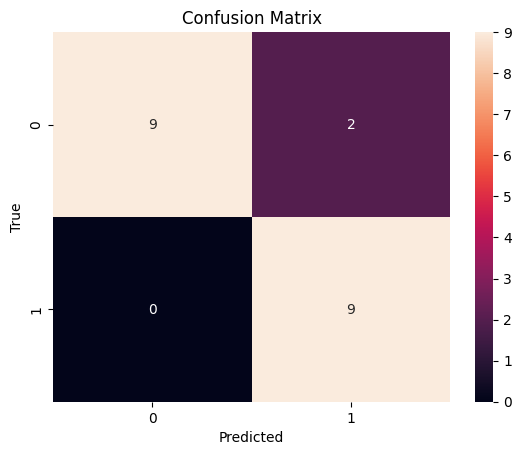

In [45]:
#Confusion matrix and classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

Melakukan evaluasi pada model menggunakan **confusion_matrix** dan **classification_report**, dari hasil tersebut didapat bahwa test pada 20 data, terdapat 2 data yang salah ditebak. Kemudian dari hasil tersbut juga didapat akurasi dari model sebesar **90%**


### Save Model


In [47]:
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Menyimpan model Logistic Regression yang sudah dibuat, untuk nantinya bisa digunakan kembali


## Link Deploy


Link deploy streamlit: https://prediksi-berita.ranwiesiel.serv00.net
